In [6]:
# Load the necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/home/dmacs/Desktop/MTech/104P/Asmt/gutters3.JPG", cv2.IMREAD_GRAYSCALE)

Problem:
The inner margin of books is referred to as a gutter. Scanning or photocopying the books, magazines or notebooks, casts shadows in the gutter. The given program cleans the gutters by removing shadows and enhancing the image. 

Procedure followed in the program:

1.Dilation Operation:
Dilation is a morphological operation and is involves convolving the image with a kernel. Here, it is a 5x5 kernel. It is used to expand the bright regions in the image. This helps in highlighting certain features and filling gaps in objects.

2.Gaussian Blur:
It reduces noise and smoothens the image. The Gaussian kernel used here is of size (3, 3).

3.Shadow Removal:
To remove shadows and enhance the contrast, we calculate the absolute difference between the original image and the blurred image and then subtract this difference from 255. We get an image where shadows are lightened, and the rest of the image is made darker.

4.Image Normalization:
We scale the pixel values in the image to span the full dynamic range from 0 to 255.

Source of the program:
https://github.com/riyasaini26/Image_Enhancement_and_Analysis_using_Python_and_OpenCV

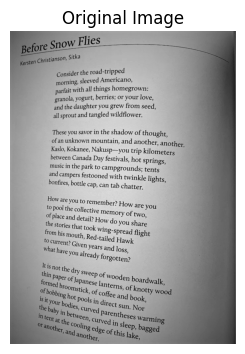

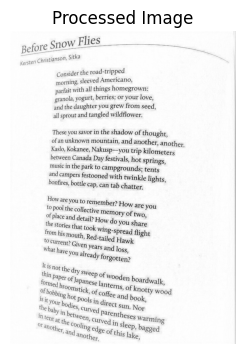

In [5]:
# Original Code

# Split the grayscale image into its planes, here only one plane(since a gray scale)
split_img = cv2.split(img)
final_img = []  # Image array to store individual processed planes

# Do the processing for each plane of the image seperately.
for plane in split_img:
    # Apply dilation to expand the image (convolving with a kernel)
    exp = cv2.dilate(plane, np.ones((5, 5), np.uint8))

    # Applying Gaussian blur to reduce noise and blur the image.
    # (3,3) is the size of the Gaussian Kernel.
    # O is the standard deviation.
    dst = cv2.GaussianBlur(exp, (3, 3), 0)

    # Remove shadows
    # Calculates the difference between the original plane and the blurred plane,
    # then invert the pixel values of the absolute difference image.
    shad = 255 - cv2.absdiff(plane, dst)

    # Normalizing the image to a 0-255 range
    norm = cv2.normalize(shad, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    # Appending individual planes to the final image array
    final_img.append(norm)

# Merging all planes to form the enhanced image
result = cv2.merge(final_img)

# Converting the result back to RGB
result_rgb = cv2.cvtColor(result, cv2.COLOR_GRAY2RGB)

# Clipping pixel values to the valid range for displaying it as RGB
result_rgb = np.clip(result_rgb, 0, 255).astype(np.uint8)

# Saving the processed image
cv2.imwrite("cleaned-gutter.jpg", result_rgb)

# Displaying the Original image
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

# Displaying the final processed image
plt.subplot(122)
plt.imshow(result_rgb)
plt.title("Processed Image")
plt.axis("off")
plt.show()


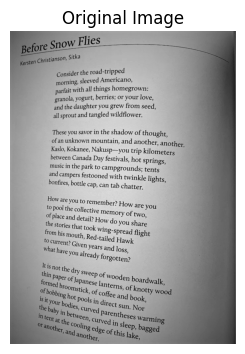

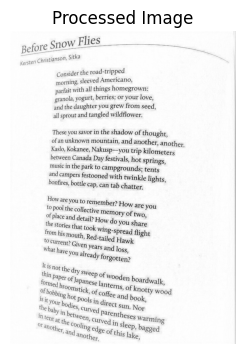

In [10]:
# Modified Code

# Since in a gray scale image there is only one plane, we need not split the grayscale image into planes.
# Hence, I modified the code to process the original image as it is.

# Applying dilation to expand the image (convolving with a kernel)
dilated_image = cv2.dilate(img, np.ones((5, 5), np.uint8))

# Applying Gaussian blur to reduce noise and blur the image. (3,3) is the size of the Gaussian Kernel.
blurred_image = cv2.GaussianBlur(dilated_image, (3, 3), 0)

# Removing shadows
shadows_removed = 255 - cv2.absdiff(img, blurred_image)

# Normalising the image
final = cv2.normalize(
    shadows_removed, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
)

# Saving the processed image
cv2.imwrite("cleaned-gutter.jpg", final)

# Displaying the Original image
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

# Displaying the final processed image
plt.subplot(122)
plt.imshow(result_rgb)
plt.title("Processed Image")
plt.axis("off")
plt.show()
